# Problem Statement and Data Description
### Chennai House Price Prediction (Regression)

ChennaiEstate is a real estate firm based in Chennai that is involved in the property business for the past 5 years. Since, they are in the business for so long, they have enough data of all the real estate transactions in the city.

They decided to venture into Analytics and have now started a division called “Chennai Estate Analytics” to give consumers as much information as possible about housings and the real estate market in Chennai. A home is often the largest and most expensive purchase a person makes in his or her lifetime. Ensuring real-estate owners have a trusted way to monitor the asset is incredibly important. Hence, they have hired you as a consultant to help them give insights and develop a model to accurately predict real estate prices.

Based on the train dataset, you will need to develop a model that accurately predicts the real estate price in Chennai.

### Data Description

## House Features
   - INT_SQFT – The interior Sq. Ft of the property
   - N_BEDROOM – The number of Bed rooms
   - N_BATHROOM - The number of bathrooms
   - N_ROOM – Total Number of Rooms
   - QS_ROOMS – The quality score assigned for rooms based on buyer reviews
   - QS_BATHROOM – The quality score assigned for bathroom based on buyer reviews
   - QS_BEDROOM – The quality score assigned for bedroom based on buyer reviews
   - QS_OVERALL – The Overall quality score assigned for the property
   - SALE_COND – The Sale Condition
       - Normal: Normal Sale
       - Abnorml: Abnormal Sale - trade, foreclosure, short sale
       - AdjLand: Adjoining Land Purchase
       - Family: Sale between family members
       - Partial: Home was not completed when last assessed
   - BUILDTYPE – The type of building
        - House
        - Commercial
        - Others



## Surrounding and Locality
   - AREA – The property in which the real estate is located
   - DIST_MAINROAD – The distance of the property to the main road
   - PARK_FACIL – Whether parking facility is available
   - UTILITY_AVAIL
        - AllPub: All public Utilities (E,G,W,& S)
        - NoSewr: Electricity, Gas, and Water (Septic Tank)
        - NoSeWa: Electricity and Gas Only
        - ELO: Electricity only
   - STREET
        - Gravel
        - Paved
        - No Access
   - MZZONE
        - A: Agriculture
        - C: Commercial
        - I: Industrial
        - RH: Residential High Density
        - RL: Residential Low Density
        - RM: Residential Medium Density
        

## House Sale Price
   - PRT_ID – The Property Transaction ID assigned by ChennaiEstate
   - COMMIS – The Commission paid to the agent
   - SALES_PRICE – The total sale price of the property


# Loading the Dataset

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the dataset
df = pd.read_csv('chennai_house_price_prediction.csv')
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


Numerical Features-'INT_SQFT','DIST_MAINROAD','N_BEDROOM','N_BATHROOM','N_ROOM','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL','COMMIS','SALES_PRICE'.

Cateogorical Features- 'PRT_ID','AREA','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE' 

In [3]:
#Size of the dataframe
df.shape

(7109, 19)

In [4]:
#All the columns of df
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'COMMIS', 'SALES_PRICE'],
      dtype='object')

In [5]:
# Let's see the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
PRT_ID           7109 non-null object
AREA             7109 non-null object
INT_SQFT         7109 non-null int64
DIST_MAINROAD    7109 non-null int64
N_BEDROOM        7108 non-null float64
N_BATHROOM       7104 non-null float64
N_ROOM           7109 non-null int64
SALE_COND        7109 non-null object
PARK_FACIL       7109 non-null object
BUILDTYPE        7109 non-null object
UTILITY_AVAIL    7109 non-null object
STREET           7109 non-null object
MZZONE           7109 non-null object
QS_ROOMS         7109 non-null float64
QS_BATHROOM      7109 non-null float64
QS_BEDROOM       7109 non-null float64
QS_OVERALL       7061 non-null float64
COMMIS           7109 non-null int64
SALES_PRICE      7109 non-null int64
dtypes: float64(6), int64(5), object(8)
memory usage: 1.0+ MB


In [6]:
#Lets see the summary statistics
df.describe(include = ['O'])

,PRT_ID,AREA,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE
count,7109,7109,7109,7109,7109,7109,7109,7109
unique,7109,17,9,3,5,5,5,6
top,P07624,Chrompet,AdjLand,Yes,House,AllPub,Paved,RL
freq,1,1681,1433,3587,2444,1886,2560,1858


- The describe function works only for continuous variables
- We can identify the number of missing values from the 'count' given
- Comparing the 75% and the max value, determine presence of outliers

# Exploratory Data Analysis

## 1.Univariate Analysis
Histogram

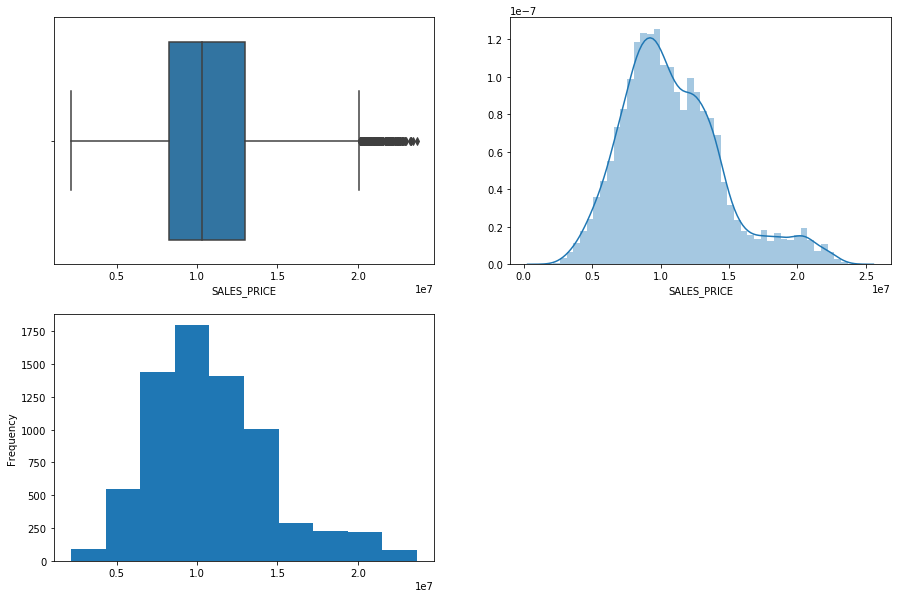

In [7]:
#target variable
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.boxplot('SALES_PRICE',data=df) 
plt.subplot(222)
sns.distplot(df['SALES_PRICE'])
plt.subplot(223)
df['SALES_PRICE'].plot.hist()

- The distribution of the target variable is slightly right skewed. 
- We can see a small number of houses with a very high price.

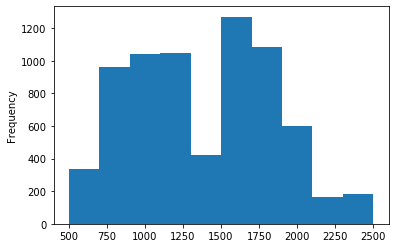

In [8]:
df['INT_SQFT'].plot.hist()

- Most houses have the area between **750 sq feet to 1250 sq feet** or around **1500 sq feet to 2000 sq feet**
- Very less number of houses have area more than 2000 sq feet or less than 750 sq feet

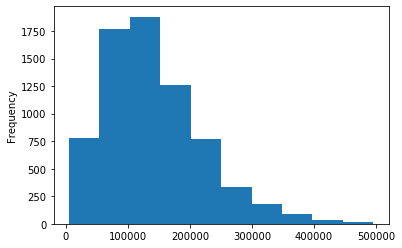

In [9]:
df['COMMIS'].plot.hist()

In [10]:
df['N_BEDROOM'].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

- It has four different categories
- This variable should be object and not integer

In [11]:
df['N_BEDROOM'].value_counts()/len(df)*100

1.0    53.383036
2.0    33.084822
3.0     9.945140
4.0     3.572936
Name: N_BEDROOM, dtype: float64

- About 53% houses have one bedroom
- 33% have 2 bedrooms
- Less than 10% houses have 3 bedrooms 
- Only 3.5% have 4 bedrooms

In [12]:
df['N_BATHROOM'].value_counts()/len(df)*100

1.0    78.618652
2.0    21.311014
Name: N_BATHROOM, dtype: float64

- 78% houses have 1 bathroom and 21% have 2 bathrooms
- The same can be represented using bar plots

In [13]:
df['N_ROOM'].value_counts()/len(df)*100

4    36.052891
3    29.891687
5    17.527078
2    12.955409
6     3.572936
Name: N_ROOM, dtype: float64

- About 36% of houses have four rooms
- 29% have three rooms
- Around 18% house have five rooms
- 13% houses have two rooms
- 4% houses have six rooms
- No houses have one room

### Barplot

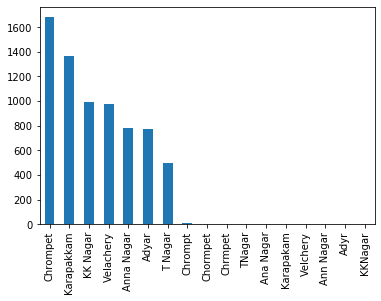

In [14]:
df['AREA'].value_counts().plot(kind = 'bar')

- There are 17 different categories in the 'AREA' variable
- Only 7 unique area name rest are repititon of the original
- maximum houses are in the area Chrompet, followed by Karapakkam

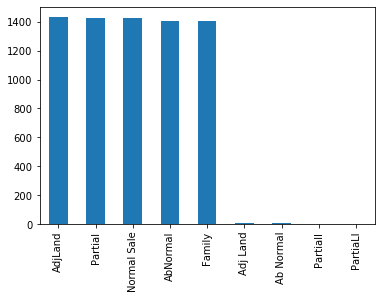

In [15]:
df['SALE_COND'].value_counts().plot(kind = 'bar')

- There are 9 different categories in the 'SALE_COND' variable
- Only 5 unique SALE name, rest are repititon of the original

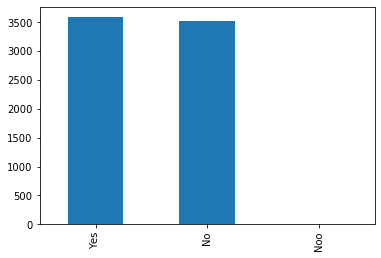

In [16]:
df['PARK_FACIL'].value_counts().plot(kind = 'bar')

- There are 3 different categories in the 'PARK_FACIL' variable
- Only 2 unique name rest are repititon of the original
- Almost equal number of Yes and No

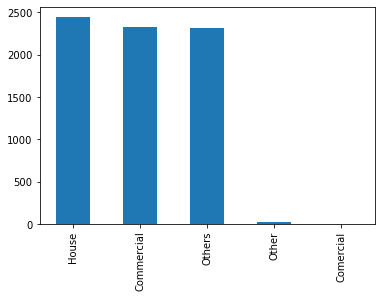

In [17]:
df['BUILDTYPE'].value_counts().plot(kind = 'bar')

- There are 5 different categories in the 'BUILDTYPE' variable
- Only 3 unique name rest are repititon of the original

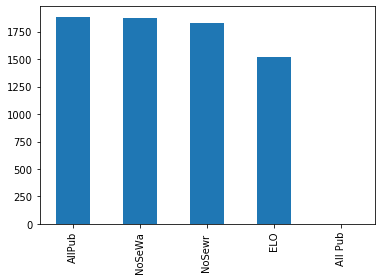

In [18]:
df['UTILITY_AVAIL'].value_counts().plot(kind = 'bar')

- There are 5 different categories in the 'UTILITY_AVAIL' variable
- Only 4 unique name rest are repititon of the original

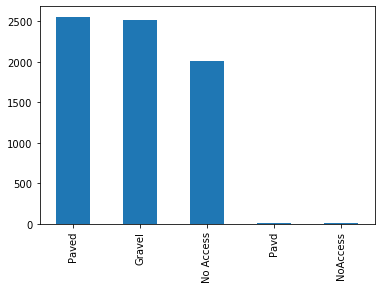

In [19]:
df['STREET'].value_counts().plot(kind = 'bar')

- There are 5 different categories in the 'STREET' variable
- Only 3 unique name rest are repititon of the original

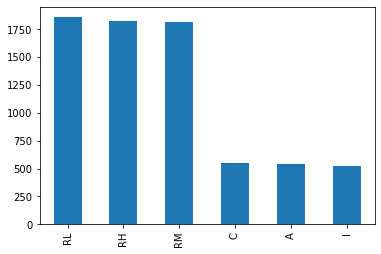

In [20]:
df['MZZONE'].value_counts().plot(kind = 'bar')

- There are 6 different categories in the 'AREA' variable

# 2.Bivariate Analysis

## Hypothesis -
 - Sales price should increase with increase in interior square feet
 - The sales price would depend on the area where house is located
 - Higher the number of rooms, bathrooms in the house, more should be the price 

### 1. Interior area and sales price (target)

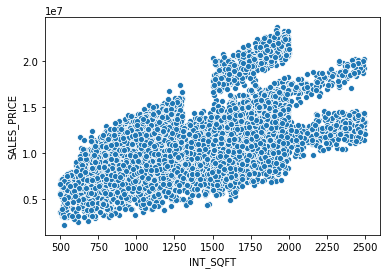

In [21]:
sns.scatterplot(x = df['INT_SQFT'],y = df['SALES_PRICE'],data = df)

- A very clear linear relationship can be seen between the interior area and sales price
- These variables have a positive correlation

###  2. Sales Price against no of bedroom and bathroom

In [23]:
# sale price of houses wrt number of bedrooms and bathroomms 
df.pivot_table(values='SALES_PRICE', index='N_BEDROOM', columns='N_BATHROOM', aggfunc='median')

N_BATHROOM,1.0,2.0
N_BEDROOM,,
1.0,9168580.0,NaN
2.0,12129780.0,9117500.0
3.0,NaN,11663490.0
4.0,NaN,13172000.0


- There are no house with 1 bedroom and 2 bathroom which is obvious.
- And also there are no 3/4 bedroom house with 1 bathroom which is right.

### 3. QS_OVERALL and sales price 

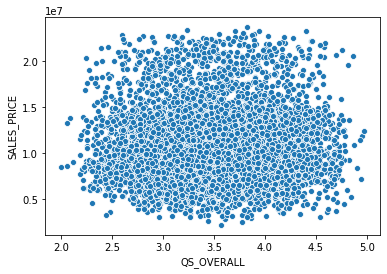

In [24]:
sns.scatterplot(x = df['QS_OVERALL'],y = df['SALES_PRICE'])

Text(0.5, 1.0, 'QS_OVERALL')

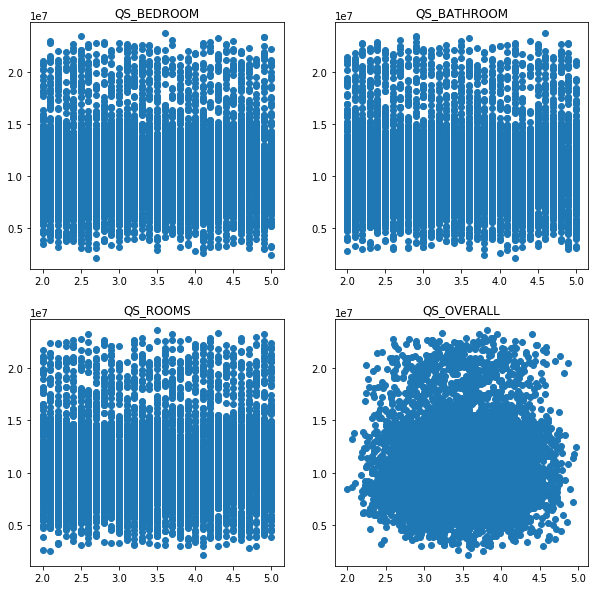

In [25]:
fig,axs = plt.subplots(2,2)

fig.set_figheight(10)
fig.set_figwidth(10)

axs[0,0].scatter(df['QS_BEDROOM'],df['SALES_PRICE'])
axs[0,0].set_title('QS_BEDROOM')

axs[0,1].scatter(df['QS_BATHROOM'],df['SALES_PRICE'])
axs[0,1].set_title('QS_BATHROOM')

axs[1,0].scatter(df['QS_ROOMS'],df['SALES_PRICE'])
axs[1,0].set_title('QS_ROOMS')

axs[1,1].scatter(df['QS_OVERALL'],df['SALES_PRICE'])
axs[1,1].set_title('QS_OVERALL')

### 4.Building type and sales price

In [26]:
df.groupby('BUILDTYPE').SALES_PRICE.median()

BUILDTYPE
Comercial      9982225
Commercial    13360440
House          8985370
Other          8104760
Others         9643160
Name: SALES_PRICE, dtype: int64

- Houses built for commercial purposes have a considerably higher sale price
- Houses with additional facility should have higher price

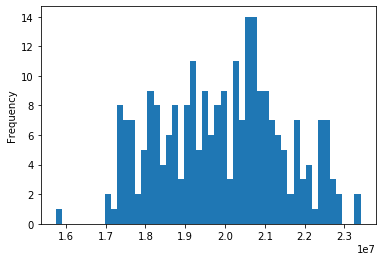

In [27]:
temp_df = df.loc[(df['BUILDTYPE']=='Commercial')&(df['AREA']=='Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

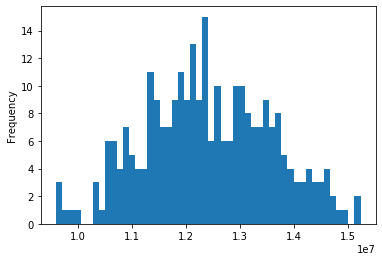

In [28]:
temp_df = df.loc[(df['BUILDTYPE']=='House')&(df['AREA']=='Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

- When Buildingtype is Commerical and Area is Anna Nagar,price range is quite high
- When Buildingtype is House and Area is Anna Nagar,price range is low as compared to Commercial

### 5. Building type and parking facility

In [29]:
df.groupby(['BUILDTYPE','PARK_FACIL']).SALES_PRICE.median()

BUILDTYPE   PARK_FACIL
Comercial   No            12617700.0
            Yes            7346750.0
Commercial  No            12695370.0
            Yes           13926030.0
House       No             8516800.0
            Noo            6468090.0
            Yes            9468150.0
Other       No             7138467.5
            Yes           10148412.5
Others      No             9144840.0
            Noo            8535580.0
            Yes           10039405.0
Name: SALES_PRICE, dtype: float64

- For all three categories, houses with park facility have a higher price
- we can use groupby function to generate a plot for better comparison

### 6. Area-wise price for houses

In [30]:
df.pivot_table(values='SALES_PRICE', index='AREA', aggfunc='median')

,SALES_PRICE
AREA,
Adyar,8871195
Adyr,9044045
Ana Nagar,20020970
Ann Nagar,13488705
Anna Nagar,13714220
Chormpet,9593035
Chrmpet,8276185
Chrompet,9607900
Chrompt,9668900


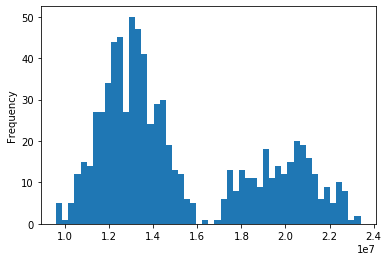

In [31]:
temp_df = df.loc[(df['AREA']=='Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

### 7. Commision and Sales Price

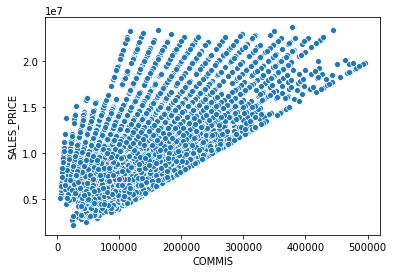

In [32]:
sns.scatterplot(df['COMMIS'],df['SALES_PRICE'])

# Data Manipulation


1. Drop Duplicates (if any)
2. Fill the missing Values
3. Correct the data types 
4. Fix the spelling errors in variables

### 1.Drop Duplicates (if any)

In [33]:
df.drop_duplicates().shape

(7109, 19)

### 2.Missing Values

In [34]:
df.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

- We can see that there are missing values in this dataset

In [35]:
#Imputation of Missing values

#N_BEDROOM
df['N_BEDROOM'] = df['N_BEDROOM'].fillna('1.0')

In [36]:
#N_BATHROOM

for i in range(0, len(df)):
    if pd.isnull(df['N_BATHROOM'][i])==True:
        if (df['N_BEDROOM'][i] == 1.0):
            df['N_BATHROOM'][i] = 1.0
        else: 
            df['N_BATHROOM'][i] = 2.0

C:\Users\Avish\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Avish\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
#QS_OVERALL
temp = (df['QS_ROOMS'] + df['QS_BATHROOM'] + df['QS_BEDROOM'])/3
pd.concat([df['QS_ROOMS'], df['QS_BATHROOM'], df['QS_BEDROOM'], temp], axis=1).head(10)

def fill_na(x):
    return ((x['QS_ROOMS'] + x['QS_BATHROOM'] + x['QS_BEDROOM'])/3)

df['QS_OVERALL'] =  df.apply(lambda x: fill_na(x) if pd.isnull(x['QS_OVERALL']) else x['QS_OVERALL'], axis=1)

In [38]:
df.isna().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
COMMIS           0
SALES_PRICE      0
dtype: int64

### 3.Data Types

In [39]:
# data type of n_bedroom, n_room, n_bathroom

df = df.astype({'N_BEDROOM': 'object', 'N_ROOM': 'object', 'N_BATHROOM': 'object'})

### 4.Replace categories

In [40]:
temp = ['AREA','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE']
for i in temp:
    print('************ Value Count in', i, '************')
    print(df[i].value_counts())
    print('')

************ Value Count in AREA ************
Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chormpet         6
Chrmpet          6
TNagar           5
Ana Nagar        3
Karapakam        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

************ Value Count in N_BEDROOM ************
1.0    3795
2.0    2352
3.0     707
4.0     254
1.0       1
Name: N_BEDROOM, dtype: int64

************ Value Count in N_BATHROOM ************
1.0    5593
2.0    1516
Name: N_BATHROOM, dtype: int64

************ Value Count in N_ROOM ************
4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

************ Value Count in SALE_COND ************
AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          

In [41]:
#PARK_FACIL
df['PARK_FACIL'] = df['PARK_FACIL'].replace({'Noo':'No'})
df['PARK_FACIL'].value_counts()


#AREA
df['AREA'] = df['AREA'].replace({'TNagar':'T Nagar', 'Adyr': 'Adyar', 'KKNagar': 'KK Nagar',  
                    'Chrompt': 'Chrompet', 'Chormpet': 'Chrompet','Chrmpet': 'Chrompet',
                    'Ana Nagar': 'Anna Nagar', 'Ann Nagar': 'Anna Nagar',
                     'Karapakam': 'Karapakkam' , 'Velchery': 'Velachery'})


#SALE_COND
df['SALE_COND'] = df['SALE_COND'].replace({'PartiaLl':'Partial', 'Partiall': 'Partial', 
                         'Adj Land': 'AdjLand',  
                         'Ab Normal': 'AbNormal'}, inplace = True)


#BUILDTYPE,UTILITY_AVAIL,STREET
df['BUILDTYPE'].replace({'Comercial':'Commercial', 'Other': 'Others'},inplace = True)
df['UTILITY_AVAIL'].replace({'All Pub':'AllPub'},inplace = True)
df['STREET'].replace({'NoAccess':'No Access', 'Pavd':'Paved'},inplace = True)

# Building Linear Regression Model

In [42]:
df = df.drop(['PRT_ID'], axis=1)

In [43]:
df = pd.get_dummies(df)

## Declaring X and y

In [50]:
X = df.drop('SALES_PRICE', axis=1)
y= df['SALES_PRICE']

## Splitting data into training and testing

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 2)

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error,r2_score

In [53]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

## Predicting the model

In [56]:
y_pred_train = lr.predict(X_train)
train_score = np.sqrt(mean_squared_log_error(y_train,y_pred_train))

In [57]:
y_pred_test = lr.predict(X_test)
valid_score=np.sqrt(mean_squared_log_error(y_test,y_pred_test))

In [58]:
print('Training score:', train_score)
print('Validation score:', valid_score)

Training score: 0.09326339606374823
Validation score: 0.09595191395938307


In [60]:
print(r2_score(y_test,y_pred_test))

0.95214195588938


### Hence we are getting an accuracy of 95.21%